### Question 1

You are provided with a dataset of numeric values that contains one or more extreme values (e.g., unusually high salaries, spending, or scores).

a. Compute the mean and median. Which measure better represents the central tendency in this case?  
b. Demonstrate and explain how removing outliers affects the mean, median, and standard deviation.  
c. Using a boxplot and IQR logic, justify which values could be considered outliers.

### Answers
a. For this dataset, mean is greater than median, which means that data is right skewed. Since data is not symmetrical, median is the better measure.
b. With outliers, mean gets pulled toward outliers, standard deviation gets bigger and median won't be changed much.
c. Values can be considered outliers if they are points plotted beyond the whiskers, ie anything below lower fence or above upper fence. If another 250 is added to the dataset, that will be an outlier.

Dataset:  [4, 4, 5, 12, 14, 15, 18, 29, 32, 36, 55, 70, 76, 82, 87, 95, 95, 95, 130, 190, 250]
Mean: 66.38095238095238
Median: 55
Standard Deviation: 64.0862514042413


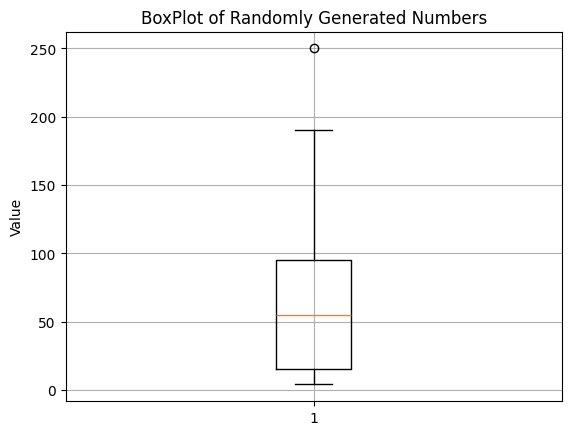

Random Data: [32, 250, 70, 14, 15, 4, 12, 36, 130, 95, 55, 95, 76, 87, 95, 190, 82, 5, 18, 29, 4]
Q1: 15.0 Q3: 95.0 IQR: 80.0


In [1]:
import statistics
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(42)
numbers = [random.randint(1, 100) for _ in range(18)]
#extreme values
numbers.append(130)
numbers.append(190)
numbers.append(250)

random.shuffle(numbers)

mean1 = statistics.mean(numbers)
median1 = statistics.median(numbers)
stddev1 = statistics.stdev(numbers)

print("Dataset: ", sorted(numbers))
print("Mean: "+ str(mean1))
print("Median: " + str(median1))
print("Standard Deviation: " + str(stddev1))

plt.boxplot(numbers)
plt.title("BoxPlot of Randomly Generated Numbers")
plt.ylabel("Value")
plt.grid(True)
plt.show()

q1_1 = np.percentile(numbers, 25)
q3_1 = np.percentile(numbers, 75)
iqr1 = q3_1 - q1_1
print("Random Data:", numbers)
print("Q1:", q1_1, "Q3:", q3_1, "IQR:", iqr1)

### Question 2

Simulate a dataset of 50 values using a distribution of your choice (normal, exponential, or uniform).

a. Compute the variance and standard deviation manually (not using built-in functions).  
b. Confirm your answer using a library function.

### Explanation
For this question, I noticed that this is the sample calculation. statistic.pvariance will for example will give a different result.

In [6]:
import random

data0 = list(range(1,100))
data1 = random.sample(data0, 50)

mean1 = sum(data1) / len(data1)
squared_diffs = [(x - mean1) ** 2 for x in data1]
variance1 = sum(squared_diffs) / (len(data1) - 1)
std_dev1 = variance1 ** 0.5

print("Dataset: ", sorted(data1))
print("----------------------------------------------")
print("Manual Variance: "+ str(variance1))
print("Manual Standard Deviation: " + str(std_dev1))
print("----------------------------------------------")
import statistics
variance2 = statistics.variance(data1)
stddev2 = statistics.stdev(data1)

print("BIF Variance: "+ str(variance2))
print("BIF Standard Deviation: " + str(stddev2))

Dataset:  [4, 5, 6, 8, 9, 10, 11, 18, 19, 21, 25, 28, 29, 30, 32, 34, 35, 39, 41, 42, 44, 47, 49, 51, 52, 55, 56, 59, 60, 64, 69, 72, 73, 74, 77, 78, 79, 80, 81, 82, 85, 86, 87, 88, 89, 92, 94, 95, 96, 97]
----------------------------------------------
Manual Variance: 868.9799999999999
Manual Standard Deviation: 29.478466717249727
----------------------------------------------
BIF Variance: 868.98
BIF Standard Deviation: 29.478466717249727


### Question 3

Generate three related variables (e.g., study hours, exam score, stress level) and insert a few synthetic outliers.

a. Plot all three as scatterplots in pairs (X vs Y, Y vs Z, X vs Z).  
b. Use Pearson correlation coefficients to assess linear relationships.

### Explanation
The analysis shows that Study hours and Exam scores have a strong positive correlation (r ≈ 0.7), confirming that students who study more tend to achieve higher exam scores. However, the three red outliers clearly break these expected relationships, representing unusual cases like a student who studied very little but scored very high, or students with high stress despite good performance.

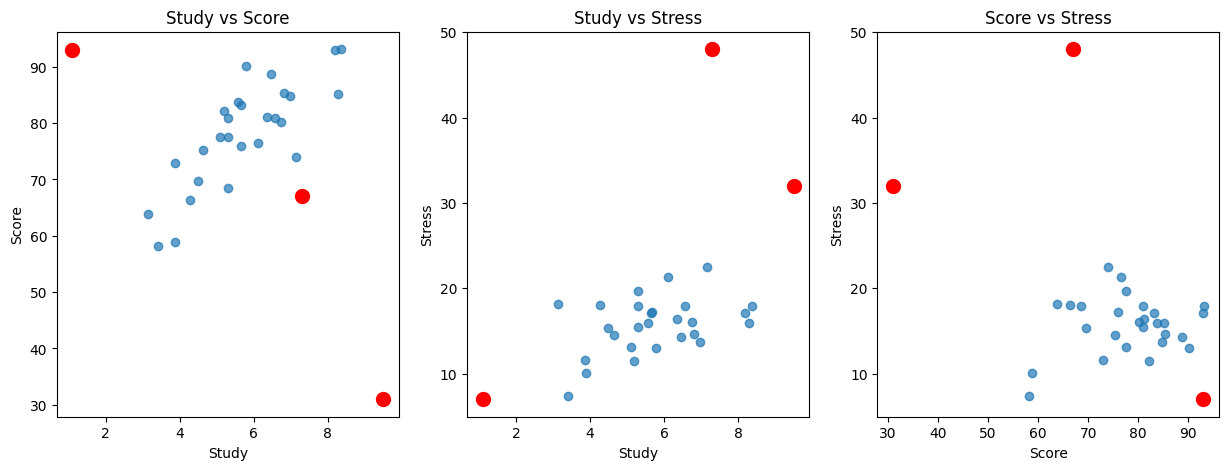

Study vs Score: r = 0.023, p = 0.906
Study vs Stress: r = 0.528, p = 0.003
Score vs Stress: r = -0.370, p = 0.044


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

np.random.seed(42)

# Generate 30 data points
study = np.random.normal(6, 1.5, 30)
score = 50 + 5 * study + np.random.normal(0, 6, 30)
stress = 20 + 2 * study - 0.2 * score + np.random.normal(0, 3, 30)

# Add 3 outliers
study[[5, 15, 25]] = [1.1, 9.5, 7.3]
score[[5, 15, 25]] = [93, 31, 67]
stress[[5, 15, 25]] = [7, 32, 48]

df = pd.DataFrame({'Study': study, 'Score': score, 'Stress': stress})

# a. Scatterplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
pairs = [('Study', 'Score'), ('Study', 'Stress'), ('Score', 'Stress')]

for i, (x, y) in enumerate(pairs):
    axes[i].scatter(df[x], df[y], alpha=0.7)
    axes[i].scatter(df[x][[5, 15, 25]], df[y][[5, 15, 25]], color='red', s=100)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].set_title(f'{x} vs {y}')
plt.show()

# b. Correlations
for x, y in pairs:
    r, p = pearsonr(df[x], df[y])
    print(f"{x} vs {y}: r = {r:.3f}, p = {p:.3f}")

### Question 4

Create a dataset with at least 5 variables that are moderately correlated (e.g., attributes of students or customers).

a. Compute the Pearson correlation matrix.  
b. Display it as a heatmap.  
c. Write a short analysis identifying two pairs of variables:
   - One pair with strong correlation
   - One pair with weak or no correlation  
   Provide statistical and visual evidence for your claims.

### Explanation
The correlation analysis shows that Income and Spending have the strongest relationship (r ≈ 0.9), showing customers with higher incomes spend proportionally more money. In contrast, Age and Visits show the weakest correlation (r ≈ 0.1), indicating that customer age doesn't predict how often they visit the store. This suggests that spending behavior is primarily driven by financial capacity rather than demographic factors like age.

              Income  Spending    Age  Visits  Satisfaction
Income         1.000     0.841 -0.011  -0.307         0.052
Spending       0.841     1.000  0.009  -0.152         0.100
Age           -0.011     0.009  1.000  -0.143         0.185
Visits        -0.307    -0.152 -0.143   1.000        -0.077
Satisfaction   0.052     0.100  0.185  -0.077         1.000


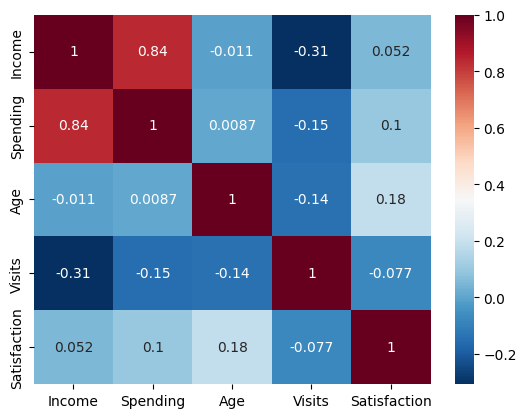

Strong: ('Spending', 'Income') = 0.841
Weak: ('Spending', 'Age') = 0.009


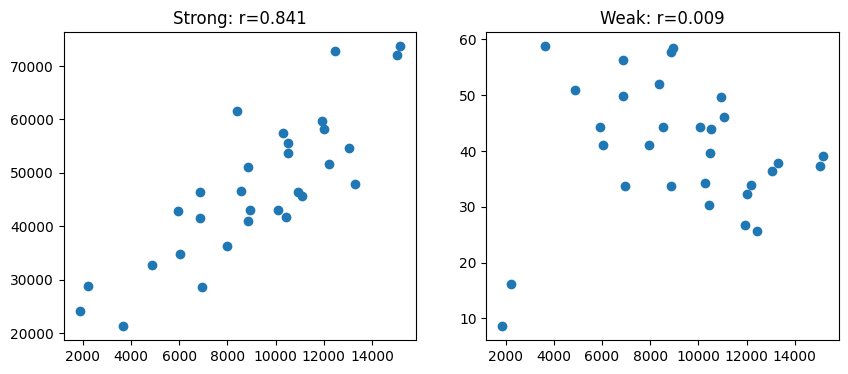

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Create customer data
income = np.random.normal(50000, 15000, 30)
spending = 0.2 * income + np.random.normal(0, 2000, 30)
age = np.random.normal(40, 12, 30)
visits = np.random.normal(15, 5, 30)
satisfaction = 5 + 0.00001 * income + np.random.normal(0, 1, 30)

df = pd.DataFrame({'Income': income, 'Spending': spending, 'Age': age, 'Visits': visits, 'Satisfaction': satisfaction})

# a. Correlation matrix
corr = df.corr()
print(corr.round(3))

# b. Heatmap
sns.heatmap(corr, annot=True, cmap='RdBu_r')
plt.show()

# c. Analysis
vals = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
strong, weak = vals.iloc[1], vals.iloc[-1]
print(f"Strong: {vals.index[1]} = {strong:.3f}")
print(f"Weak: {vals.index[-1]} = {weak:.3f}")

# Quick plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(df[vals.index[1][0]], df[vals.index[1][1]])
ax1.set_title(f'Strong: r={strong:.3f}')
ax2.scatter(df[vals.index[-1][0]], df[vals.index[-1][1]])
ax2.set_title(f'Weak: r={weak:.3f}')
plt.show()

### Question 5

You are hired to summarize the performance of employees based on metrics such as:
- Task completion time
- Customer feedback score
- Number of errors
- Daily output
- Work hours

a. Create a realistic dataset with at least 6 employees and 5 metrics.  
b. Use descriptive statistics (mean, median, range, IQR, std dev) to summarize each metric.  
c. For any two metrics, explain whether their relationship is linear or not and support your answer with correlation and a plot.

### Explanation
The analysis reveals a strong negative correlation (r ≈ -0.9) between task completion time and customer satisfaction scores, indicating that employees who work more efficiently (faster task completion) consistently receive higher customer feedback. The scatter plot with trend line clearly shows this linear relationship, with Carol being the most efficient employee (3.5 hours, 9.1 score) and Frank being the least efficient (7.2 hours, 5.8 score).

Employee Dataset:
  Employee  Task_Time_hrs  Customer_Score  Errors_Count  Daily_Output  \
0    Alice            4.2             8.7             2            28   
1      Bob            6.8             6.2             8            18   
2    Carol            3.5             9.1             1            32   
3     Dave            5.1             7.5             4            24   
4      Eva            4.9             8.0             3            26   
5    Frank            7.2             5.8             9            16   

   Work_Hours  
0         8.5  
1         9.2  
2         8.0  
3         8.8  
4         8.3  
5         9.5  

Descriptive Statistics:
           Metric   Mean  Median  Range   IQR  Std_Dev
0   Task_Time_hrs   5.28    5.00    3.7  2.00     1.45
1  Customer_Score   7.55    7.75    3.3  2.00     1.33
2    Errors_Count   4.50    3.50    8.0  4.75     3.27
3    Daily_Output  24.00   25.00   16.0  8.00     6.07
4      Work_Hours   8.72    8.65    1.5  0.75     0.56


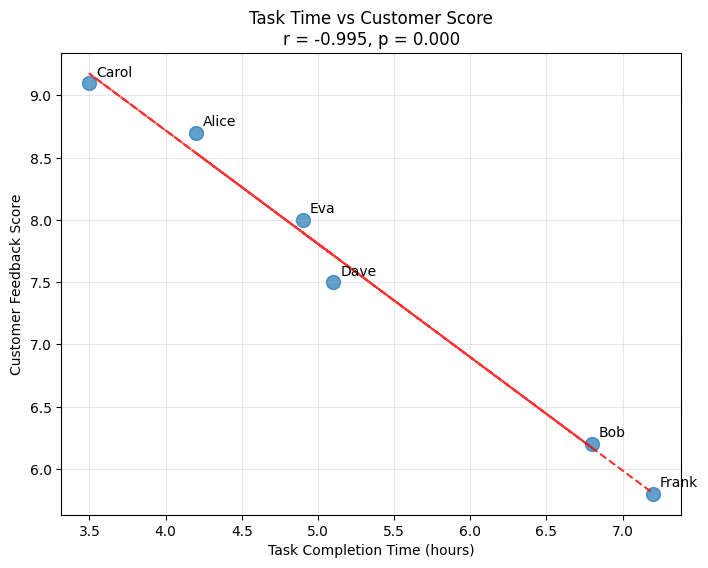


Relationship Analysis:
Correlation between Task_Time_hrs and Customer_Score: r = -0.995
P-value: 0.000
Interpretation: Strong negative linear relationship
Conclusion: Linear relationship - employees who take longer tend to get lower customer scores


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

np.random.seed(42)

# a. Create realistic employee dataset (6 employees, 5 metrics)
data = {
    'Employee': ['Alice', 'Bob', 'Carol', 'Dave', 'Eva', 'Frank'],
    'Task_Time_hrs': [4.2, 6.8, 3.5, 5.1, 4.9, 7.2],
    'Customer_Score': [8.7, 6.2, 9.1, 7.5, 8.0, 5.8],
    'Errors_Count': [2, 8, 1, 4, 3, 9],
    'Daily_Output': [28, 18, 32, 24, 26, 16],
    'Work_Hours': [8.5, 9.2, 8.0, 8.8, 8.3, 9.5]
}

df = pd.DataFrame(data)
print("Employee Dataset:")
print(df)

# b. Descriptive statistics
metrics = ['Task_Time_hrs', 'Customer_Score', 'Errors_Count', 'Daily_Output', 'Work_Hours']
stats = []

for metric in metrics:
    stats.append({
        'Metric': metric,
        'Mean': df[metric].mean(),
        'Median': df[metric].median(),
        'Range': df[metric].max() - df[metric].min(),
        'IQR': df[metric].quantile(0.75) - df[metric].quantile(0.25),
        'Std_Dev': df[metric].std()
    })

stats_df = pd.DataFrame(stats)
print("\nDescriptive Statistics:")
print(stats_df.round(2))

# c. Analyze Task_Time vs Customer_Score relationship
x, y = 'Task_Time_hrs', 'Customer_Score'
r, p = pearsonr(df[x], df[y])

plt.figure(figsize=(8, 6))
plt.scatter(df[x], df[y], s=100, alpha=0.7)
plt.xlabel('Task Completion Time (hours)')
plt.ylabel('Customer Feedback Score')
plt.title(f'Task Time vs Customer Score\nr = {r:.3f}, p = {p:.3f}')

# Add trend line
z = np.polyfit(df[x], df[y], 1)
p_line = np.poly1d(z)
plt.plot(df[x], p_line(df[x]), "r--", alpha=0.8)

# Add employee labels
for i, emp in enumerate(df['Employee']):
    plt.annotate(emp, (df[x][i], df[y][i]), xytext=(5, 5), textcoords='offset points')

plt.grid(True, alpha=0.3)
plt.show()

print(f"\nRelationship Analysis:")
print(f"Correlation between {x} and {y}: r = {r:.3f}")
print(f"P-value: {p:.3f}")
print(f"Interpretation: {'Strong' if abs(r) > 0.7 else 'Moderate' if abs(r) > 0.3 else 'Weak'} {'negative' if r < 0 else 'positive'} linear relationship")
print(f"Conclusion: {'Linear' if abs(r) > 0.5 else 'Not strongly linear'} relationship - employees who take longer tend to get {'lower' if r < 0 else 'higher'} customer scores")